<h1> IS362 Week 12 Assignment 8 </h1>

First study the dataset and the associated description of the data (i.e. “data dictionary”). You may need to 
look around a bit, but it’s there! 
• Create a pandas DataFrame with a subset of the columns in the dataset. You should include the column 
that indicates edible or poisonous, the column that includes odor, and at least one other column of your 
choosing.
• Add meaningful names for each column.
• Replace the codes used in the data with numeric values—for example, in the first “target” column, “e” might 
become 0 and “p” might become 1. This is because your downstream processing in Project 4 using 
scikit-learn requires that values be stored as numerics.
• Perform exploratory data analysis: show the distribution of data for each of the columns you selected, and 
show scatterplots for edible/poisonous vs. odor as well as the other column that you selected.
• Include some text describing your preliminary conclusions about whether either of the other columns 
could be helpful in predicting if a specific mushroom is edible or poisonous

In [2]:
#From the ucimlrepo https://archive.ics.uci.edu/dataset/73/mushroom download the dataset into Pandas.
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
mushroom = fetch_ucirepo(id=73) 
  
# data (as pandas dataframes) 
X = mushroom.data.features 
y = mushroom.data.targets 
  
# metadata 
print(mushroom.metadata) 
  
# variable information 
print(mushroom.variables) 


{'uci_id': 73, 'name': 'Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/73/mushroom', 'data_url': 'https://archive.ics.uci.edu/static/public/73/data.csv', 'abstract': 'From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classification: poisonous or edible', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 8124, 'num_features': 22, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['poisonous'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1981, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5959T', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely po

In [6]:
import pandas as pd
import numpy as np
df= pd.DataFrame(X)
df1=pd.DataFrame(y)
df

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [10]:
#Combine the dataframes to include the Poison column  
df2= pd.concat([df, df1], axis=1, join='inner')
df2

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,o,o,p,o,o,p,b,c,l,e
8120,x,s,n,f,n,a,c,b,y,e,...,o,o,p,n,o,p,b,v,l,e
8121,f,s,n,f,n,a,c,b,n,e,...,o,o,p,o,o,p,b,c,l,e
8122,k,y,n,f,y,f,c,n,b,t,...,w,w,p,w,o,e,w,v,l,p


<h2> Replace the letter keys with the full word to create a meaningful table. </h2>

A very long process of changing the keys to the words so text based analysis can be conducted.Creating a numeric or statistical coding requires first deciphering which types of classifications are being studied with the natural language of each category.

In [12]:
df2["poisonous"]= df2["poisonous"].replace({"e": "edible", "p": "poison"}).fillna("Unknown")
df2["cap-shape"]= df2["cap-shape"].replace({"b":"bell", "c":"conical","x":"convex","f":"flat", "k":"knobbed","s":"sunken"}).fillna("Unknown")
df2["cap-surface"]= df2["cap-surface"].replace({ "f":"fibrous", "g":"grooves","y":"scaly","s":"smooth"})
df2["cap-color"]=df2["cap-color"].replace({"n":"brown","b":"buff","c":"cinnamon","g":"gray","r":"green", "p":"pink","u":"purple","e":"red","w":"white","y":"yellow"})
df2["bruises"]= df2["bruises"].replace({"t":"bruises","f":"no"})
df2["odor"]= df2["odor"].replace({"a":"almond","l":"anise","c":"creosote","y":"fishy","f":"foul", "m":"musty","n":"none","p":"pungent","s":"spicy"})
df2["gill-attachment"]=df2["gill-attachment"].replace({"a":"attached","d":"descending","f":"free","n":"notched"})
df2["gill-spacing"]= df2["gill-spacing"].replace({"c":"close","w":"crowded","d":"distant"})
df2["gill-size"]= df2["gill-size"].replace({"b":"broad","n":"narrow"})
df2["gill-color"]= df2["gill-color"].replace({"k":"black","n":"brown","b":"buff","h":"chocolate","g":"gray", "r": "green", "o":"orange","p":"pink","u":"purple","e":"red", "w":"white","y":"yellow"})
df2["stalk-shape"]=df2["stalk-shape"].replace({"e":"enlarging","t":"tapering"})
df2["stalk-root"]=df2["stalk-root"].replace({"b":"bulbous","c":"club","u":"cup","e":"equal", "z":"rhizomorphs","r":"rooted","?":"missing"})
df2["stalk-surface-above-ring"]=df2["stalk-surface-above-ring"].replace({"f":"fibrous","y":"scaly","k":"silky","s":"smooth"})
df2["stalk-surface-below-ring"]=df2["stalk-surface-below-ring"].replace({"f":"fibrous","y":"scaly","k":"silky","s":"smooth"})
df2["stalk-color-above-ring"]=df2["stalk-color-above-ring"].replace({"n":"brown","b":"buff","c":"cinnamon","g":"gray","o":"orange","p":"pink","e":"red","w":"white","y":"yellow"})
df2["stalk-color-below-ring"]=df2["stalk-color-below-ring"].replace({"n":"brown","b":"buff","c":"cinnamon","g":"gray","o":"orange","p":"pink","e":"red","w":"white","y":"yellow"})
df2["veil-type"]=df2["veil-type"].replace({"p":"partial","u":"universal"})
df2["veil-color"]=df2["veil-color"].replace({"n":"brown","o":"orange","w":"white","y":"yellow"})
df2["ring-number"]=df2["ring-number"].replace({"n":"none","o":"one","t":"two"})
df2["ring-type"]=df2["ring-type"].replace({"c":"cobwebby","e":"evanescent","f":"flaring","l":"large","n":"none","p":"pendant","s":"sheathing","z":"zone"})
df2["spore-print-color"]=df2["spore-print-color"].replace({"k":"black","n":"brown","b":"buff","h":"chocolate","r":"green","o": "orange","u":"purple","w":"white","y":"yellow"})
df2["population"]=df2["population"].replace({"a":"abundant","c":"clustered","n":"numerous", "s":"scattered","v":"several","y":"solitary"})
df2["habitat"]=df2["habitat"].replace({"g":"grasses","l":"leaves","m":"meadows","p":"paths","u": "urban","w":"waste","d":"woods"})
df2

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,convex,smooth,brown,bruises,pungent,free,close,narrow,black,enlarging,...,white,white,partial,white,one,pendant,black,scattered,urban,poison
1,convex,smooth,yellow,bruises,almond,free,close,broad,black,enlarging,...,white,white,partial,white,one,pendant,brown,numerous,grasses,edible
2,bell,smooth,white,bruises,anise,free,close,broad,brown,enlarging,...,white,white,partial,white,one,pendant,brown,numerous,meadows,edible
3,convex,scaly,white,bruises,pungent,free,close,narrow,brown,enlarging,...,white,white,partial,white,one,pendant,black,scattered,urban,poison
4,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,...,white,white,partial,white,one,evanescent,brown,abundant,grasses,edible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,knobbed,smooth,brown,no,none,attached,close,broad,yellow,enlarging,...,orange,orange,partial,orange,one,pendant,buff,clustered,leaves,edible
8120,convex,smooth,brown,no,none,attached,close,broad,yellow,enlarging,...,orange,orange,partial,brown,one,pendant,buff,several,leaves,edible
8121,flat,smooth,brown,no,none,attached,close,broad,brown,enlarging,...,orange,orange,partial,orange,one,pendant,buff,clustered,leaves,edible
8122,knobbed,scaly,brown,no,fishy,free,close,narrow,buff,tapering,...,white,white,partial,white,one,evanescent,white,several,leaves,poison


<h2> Find an interesting data set using the columns. Data exploration</h2>

The first step was to see count of poisonous and edible mushrooms in seaborn scatterplot.

The second step was to see the count of smelly mushrooms in seaborn scatterplot.

The third step was to see the count by mushroom cap color in scatter plot.

The fourth step was to see only poisonous mushrooms by gill color in seaborn scatter plot.


In [14]:
#Find interesting subsets
df3= df2.loc[(df2['cap-shape'] == "convex") & (df2['cap-surface'] == "smooth") ]
# Sorting by 'Poisonous'
dfcolor=df3.poisonous.value_counts()
dfcolor

poisonous
poison    592
edible    482
Name: count, dtype: int64

<Axes: xlabel='poisonous', ylabel='count'>

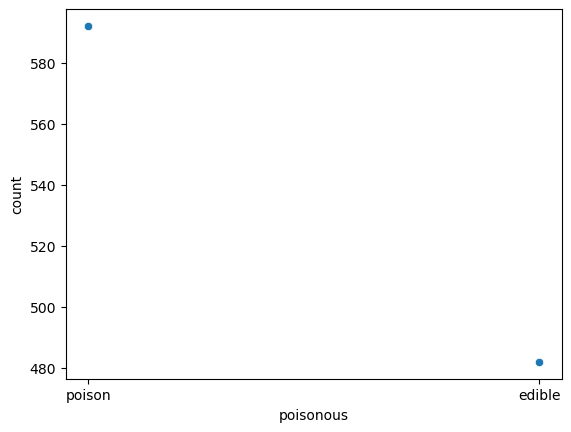

In [16]:
import numpy as np 
import seaborn as sns 
#Step 1 
sns.scatterplot(dfcolor)

<Axes: xlabel='odor', ylabel='count'>

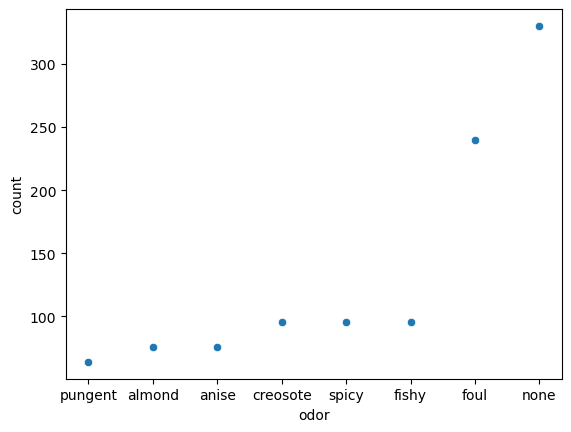

In [18]:
#Step 2 by odor
sns.scatterplot(df3.odor.value_counts().sort_values())

<Axes: xlabel='cap-color', ylabel='count'>

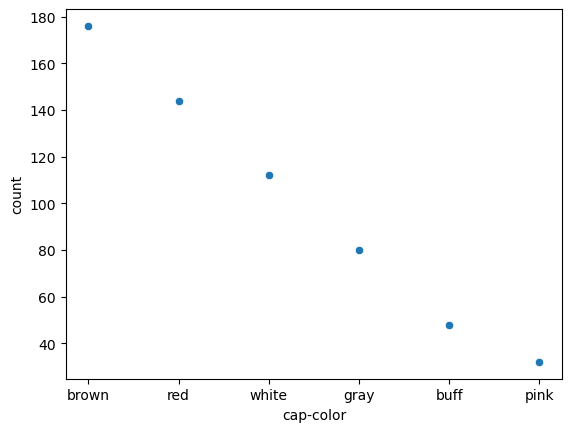

In [20]:
#Step 3 see by cap color
df4=df3[['cap-color','odor', 'poisonous']]
df4=df4.loc[(df4['poisonous'] == "poison")]
sns.scatterplot(df4.sort_values('poisonous').value_counts('cap-color'))

<Axes: xlabel='gill-color', ylabel='count'>

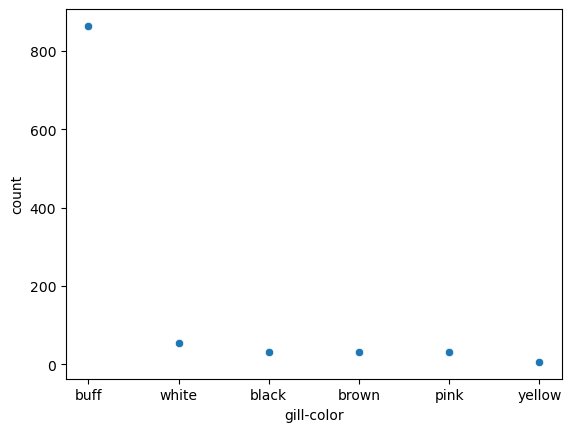

In [22]:
#Count number of poisonous mushrooms by gill color
df5= df2.loc[(df2['poisonous'] == "poison")& (df2['cap-color'] == "brown") ]
sns.scatterplot(df5.value_counts('gill-color'))

<h1> Applying Initial assumptions to SciKit learn </h1>

Hypothesis: The gill color and cap color are  related to telling if a mushroom is poisonous or not. 

The buff gill color indicates if poisonous. Brown and red cap color mushrooms have a   probability of poisonous. However, odor is not necessarily a determinant if a mushroom is poisonous or not. This was shown by the seaborn scatterplots above.

Also its important to note most mushroom poisons can be made into neurotoxins and blood related toxins. But similarly its possible to create counter toxins with appropriate choline chemistry. White odorless mushrooms, there is 50/50 chance of toxicity for wild mushrooms. But darker colored mushrooms may be more likely to be poisonous. 

In [37]:
df2["poisonous"]= df2["poisonous"].replace({"edible": 0, "poison": 1}).fillna(2)
df2["cap-shape"]= df2["cap-shape"].replace({"brown":.1,"conical": .2,"convex":.3,"flat": .4, "knobbed": .5,"sunken":.6,"bell":7}).fillna(".9")
df2["cap-surface"]= df2["cap-surface"].replace({ "fibrous": .1, "grooves":.2,"scaly":.3,"smooth":.4})
df2["cap-color"]=df2["cap-color"].replace({"brown": .1,"buff":.2,"cinnamon":.3,"gray":.4,"green":.5, "pink":.6,"purple":.7,"red":.8,"white":.9,"yellow": 1})
df2["bruises"]= df2["bruises"].replace({"bruises":1, "no":0})
df2["odor"]= df2["odor"].replace({"almond":1,"anise":2,"creosote":3,"fishy":4,"foul":5, "musty":6,"none":7,"pungent":8,"spicy":9})
df2["gill-attachment"]=df2["gill-attachment"].replace({"attached":10,"descending":20,"free":30,"notched":40})
df2["gill-spacing"]= df2["gill-spacing"].replace({"close":10,"crowded":20,"distant":30})
df2["gill-size"]= df2["gill-size"].replace({"broad":0,"narrow":1})
df2["gill-color"]= df2["gill-color"].replace({"black":100,"brown":200,"buff":300,"chocolate":400,"gray":500,"green":600,"orange":700,"pink":800,"purple":900,"red":1000,"white":1100,"yellow":1200})
df2["stalk-shape"]=df2["stalk-shape"].replace({"enlarging":0,"tapering":1})
df2["stalk-root"]=df2["stalk-root"].replace({"bulbous":.01,"club":.02,"cup":.03,"equal":.04,"rhizomorphs":.05,"rooted":.06,"missing":.07})
df2["stalk-surface-above-ring"]=df2["stalk-surface-above-ring"].replace({"fibrous":.01,"scaly":.02,"silky":.03,"smooth":.04})
df2["stalk-surface-below-ring"]=df2["stalk-surface-below-ring"].replace({"fibrous":.01,"scaly":.02,"silky":.03,"smooth":.04})
df2["stalk-color-above-ring"]=df2["stalk-color-above-ring"].replace({"brown":1,"buff":2,"cinnamon":3,"gray":4,"orange":5,"pink":6,"red":7,"white":8,"yellow":9})
df2["stalk-color-below-ring"]=df2["stalk-color-below-ring"].replace({"n":"brown","b":"buff","c":"cinnamon","g":"gray","o":"orange","p":"pink","e":"red","w":"white","y":"yellow"})
df2["veil-type"]=df2["veil-type"].replace({"p":"partial","u":"universal"})
df2["veil-color"]=df2["veil-color"].replace({"n":"brown","o":"orange","w":"white","y":"yellow"})
df2["ring-number"]=df2["ring-number"].replace({"n":"none","o":"one","t":"two"})
df2["ring-type"]=df2["ring-type"].replace({"c":"cobwebby","e":"evanescent","f":"flaring","l":"large","n":"none","p":"pendant","s":"sheathing","z":"zone"})
df2["spore-print-color"]=df2["spore-print-color"].replace({"k":"black","n":"brown","b":"buff","h":"chocolate","r":"green","o": "orange","u":"purple","w":"white","y":"yellow"})
df2["population"]=df2["population"].replace({"a":"abundant","c":"clustered","n":"numerous", "s":"scattered","v":"several","y":"solitary"})
df2["habitat"]=df2["habitat"].replace({"g":"grasses","l":"leaves","m":"meadows","p":"paths","u": "urban","w":"waste","d":"woods"})
df2

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,0.3,0.4,0.1,1,8,30,10,1,100,0,...,8,white,partial,white,one,pendant,black,scattered,urban,1
1,0.3,0.4,1.0,1,1,30,10,0,100,0,...,8,white,partial,white,one,pendant,brown,numerous,grasses,0
2,7.0,0.4,0.9,1,2,30,10,0,200,0,...,8,white,partial,white,one,pendant,brown,numerous,meadows,0
3,0.3,0.3,0.9,1,8,30,10,1,200,0,...,8,white,partial,white,one,pendant,black,scattered,urban,1
4,0.3,0.4,0.4,0,7,30,20,0,100,1,...,8,white,partial,white,one,evanescent,brown,abundant,grasses,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0.5,0.4,0.1,0,7,10,10,0,1200,0,...,5,orange,partial,orange,one,pendant,buff,clustered,leaves,0
8120,0.3,0.4,0.1,0,7,10,10,0,1200,0,...,5,orange,partial,brown,one,pendant,buff,several,leaves,0
8121,0.4,0.4,0.1,0,7,10,10,0,200,0,...,5,orange,partial,orange,one,pendant,buff,clustered,leaves,0
8122,0.5,0.3,0.1,0,4,30,10,1,300,1,...,8,white,partial,white,one,evanescent,white,several,leaves,1


<h2> Nearest neighnors tutorial for scikit learn<h2>
    
    Link to tutorial: https://scikit-learn.org/stable/modules/neighbors.html
    
    The example below is directly from the tutorial try and see how a Numpy array is given a distance function for each indices. 

In [134]:
#Lets try Nearest neighbors with scikit learn. Copied from the tutorial from https://scikit-learn.org/stable/modules/neighbors.html
from sklearn.neighbors import NearestNeighbors, KDTree
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)
print(indices,
distances)

[[0 1]
 [1 0]
 [2 1]
 [3 4]
 [4 3]
 [5 4]] [[0.         1.        ]
 [0.         1.        ]
 [0.         1.41421356]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.41421356]]


<h3> Relating gill-color and cap-color and cap-shape to poisonous value using scikit learn nearest neighbor</h3>

Using the guidance of the tutorial, there are two arrays. Each array has two fields, linked to the poisonous trait in the dataframe. And we can find out from the numerical value what is associated to poisonous in terms of gill color and cap color. 



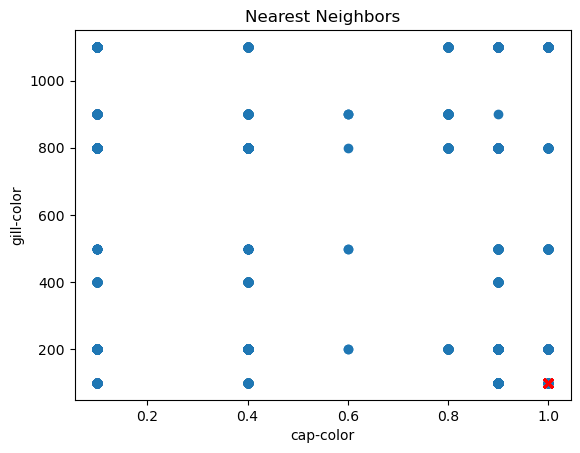

In [145]:
import matplotlib.pyplot as plt
# Create some random data (you can replace this with your actual data)
dataA = df2[['cap-color','gill-color']].head(3000)
dataB = df2[['gill-color','poisonous']].head(3000)

# Build the KDTree for dataB
kdB = KDTree(dataB.values)

# Find the 3 nearest neighbors for each point in dataA
nearest_neighbors_indices = kdB.query(dataA.values, k=3)[-1]

plt.scatter(dataA['cap-color'], dataA['gill-color'], label='Data Points')
for idx in nearest_neighbors_indices:
    plt.scatter(dataB.loc[idx, 'poisonous'], dataB.loc[idx, 'gill-color'], marker='x', color='red', label='poison')
plt.xlabel('cap-color')
plt.ylabel('gill-color')
plt.title('Nearest Neighbors')
plt.show()

<h1> Conclusion: Yellow cap color and black gill color are in poisonous territory</h1>

My attempt was to turn the text based values into numerical values to try and map it out statistically. 
I felt nearest neigbors was easiest to start with and helped with finding easy relationship of poisonous and gill color and cap color. 